In [1]:
%reload_ext lab_black
import pandas as pd
import numpy as np
from plotnine import *

In [4]:
# read data
od = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/coneel/10_code/od_deaths_state.csv?token=ARFW6V3OWJEBEXR6EAMOD4S7SS5MM"
)

population = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/estimating-impact-of-opioids-2020-purlple-team/ssloate/20_intermediate_files/countypopulations_clean.csv?token=ARFW6VZW7KFOHXGAJTTMYOK7SXO4E"
)

In [5]:
# rename od columns to match
od = od.rename(columns={"County Code": "FIPS"})

# drop _merge column in popualtion dataset
population = population.drop(columns="_merge")

In [6]:
# merge dataset. Use inner merge, because it's okay if some years/counties don't have data in th od dataset. That just means there were less than 10 deaths
od_pop = pd.merge(population, od, on=["FIPS", "Year"], how="inner", indicator=True)

assert od_pop[od_pop["_merge"] == "both"].all

In [7]:
# convert years to integers
od_pop["Year"] = od_pop["Year"].astype("int")

In [8]:
od_pop.sample(25)

,Unnamed: 0,State Name,County_x,Year,Population,FIPS,State Abbr,County_y,State,Deaths,_merge
1838,9333,Georgia,Muscogee County,2013,203225,13215,GA,Muscogee County,GA,11.0,both
4489,36506,New York,Kings County,2006,2436132,36047,NY,Kings County,NY,284.0,both
5211,40771,Ohio,Erie County,2011,76687,39043,OH,Erie County,OH,12.0,both
5715,44071,Oregon,Linn County,2011,118164,41043,OR,Linn County,OR,17.0,both
4844,37950,North Carolina,Forsyth County,2010,351374,37067,NC,Forsyth County,NC,18.0,both
4731,37528,North Carolina,Cabarrus County,2008,171915,37025,NC,Cabarrus County,NC,21.0,both
3161,23628,Maryland,Montgomery County,2008,942748,24031,MD,Montgomery County,MD,45.0,both
1808,8705,Georgia,Henry County,2005,169607,13151,GA,Henry County,GA,11.0,both
3420,24745,Michigan,Ingham County,2005,282970,26065,MI,Ingham County,MI,19.0,both
5262,40947,Ohio,Hamilton County,2007,801815,39061,OH,Hamilton County,OH,109.0,both


In [9]:
# drop unneeded columns

od_pop = od_pop.drop(columns=["County_y", "State", "_merge"])

In [10]:
# rename columns for easier understanding
od_pop = od_pop.rename(
    columns={"State Name": "State", "County_x": "County"},
    errors="raise",
)

# reorder columns
od_pop = od_pop[
    ["FIPS", "State Abbr", "State", "County", "Year", "Deaths", "Population"]
]

# sort by state, county
od_pop = od_pop.sort_values(["State", "County", "Year"])
od_pop.sample(25)

,FIPS,State Abbr,State,County,Year,Deaths,Population
5286,39081,OH,Ohio,Jefferson County,2006,11.0,70656
1411,12087,FL,Florida,Monroe County,2011,20.0,73967
2068,17111,IL,Illinois,McHenry County,2003,13.0,281743
6133,42111,PA,Pennsylvania,Somerset County,2003,10.0,79754
3402,26049,MI,Michigan,Genesee County,2003,34.0,441689
394,6017,CA,California,El Dorado County,2012,30.0,180575
6141,42115,PA,Pennsylvania,Susquehanna County,2014,16.0,42085
7372,51710,VA,Virginia,Norfolk City,2006,21.0,243406
5051,37167,NC,North Carolina,Stanly County,2012,10.0,60462
3294,25017,MA,Massachusetts,Middlesex County,2004,113.0,1459232


In [11]:
# Create per capita deaths column
od_pop["Deaths Per 100,000 People"] = (od_pop["Deaths"] / od_pop["Population"]) * 100000

In [16]:
# create TX, FL, and WA datasets

# Florida: pre and post 2010
FL_policy_year = 2010
FL = od_pop[od_pop["State Abbr"] == "FL"]
FL_pre = FL[FL["Year"] < FL_policy_year]
FL_post = FL[FL["Year"] >= FL_policy_year]

# Texas: pre and post 2007
TX_policy_year = 2007
TX = od_pop[od_pop["State Abbr"] == "TX"]
TX_pre = TX[TX["Year"] < TX_policy_year]
TX_post = TX[TX["Year"] >= TX_policy_year]

# WA: pre and post 2012
WA_policy_year = 2012
WA = od_pop[od_pop["State Abbr"] == "WA"]
WA_pre = WA[WA["Year"] < WA_policy_year]
WA_post = WA[WA["Year"] >= WA_policy_year]

# create a list of the states
titles = od_pop["State"].unique()
titles = titles.tolist()

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_pre_post


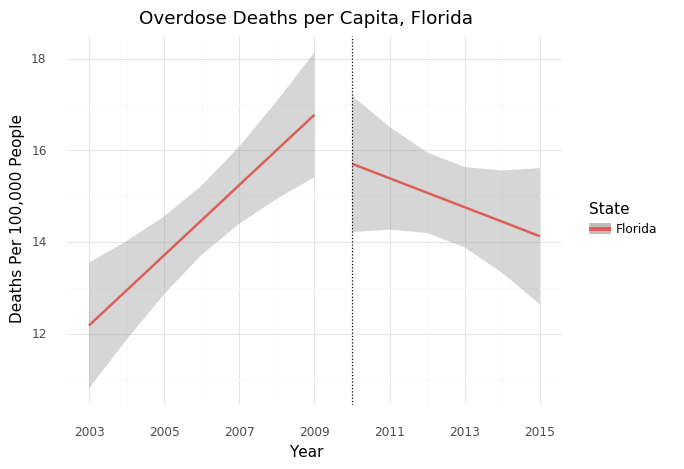

<ggplot: (8766180299917)>


In [129]:
# graph pre-post: Florida
p = (
    ggplot()
    + geom_smooth(
        FL_pre, aes(x="Year", y="Deaths Per 100,000 People", color="State"), method="lm"
    )
    + geom_smooth(
        FL_post,
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=2010, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths Per 100,000 People")
    + theme_minimal()
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(title="Overdose Deaths per Capita, Florida")
)
ggsave(
    plot=p,
    filename="FL_pre_post",
    path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
    dpi=100,
)
print(p)

In [ ]:
# graph pre-post: Texas
p = (
    ggplot()
    + geom_smooth(
        TX_pre,
        aes(x="Year", y="Deaths Per 100,000 People", color='State'),
        method="lm",
    )
    + geom_smooth(
        TX_post,
        aes(x="Year", y="Deaths Per 100,000 People", color='State'),
        method="lm",
    )
    + geom_vline(xintercept=2007, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths Per 100,000 People")
    + theme_minimal()
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(title="Overdose Deaths per Capita, Texas")
)
ggsave(
    plot=p,
    filename="TX_pre_post",
    path="//Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
    dpi=100,
)

In [114]:
# graph pre-post: Washington
p = (
    ggplot()
    + geom_smooth(
        WA_pre,
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_smooth(
        WA_post,
        aes(x="Year", y="Deaths Per 100,000 People", color="State"),
        method="lm",
    )
    + geom_vline(xintercept=2012, linetype="dotted")
    + xlab("Year")
    + ylab("Deaths Per 100,000 People")
    + theme_minimal()
    + scale_x_continuous(
        breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
    )
    + labs(title="Overdose Deaths per Capita, Washington")
)
ggsave(
    plot=p,
    filename="WA_pre_post",
    path="//Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results",
    dpi=100,
)

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: //Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_pre_post


In [23]:
# generate pre and post datasets in 2010, for Florida DiD
states = od_pop["State Abbr"].unique()
FL_df_pre = []
FL_df_post = []

# creates list of dataframes with pre 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_pre.append(x)


# creates list of dataframes with post 2010 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= FL_policy_year]
    # x will be a state for 2010 or lower years
    FL_df_post.append(x)

# run checks
assert len(FL_df_pre) == len(FL_df_post)
assert len(FL_df_pre) == 50

In [24]:
# generate pre and post datasets in 2007, for Texas DiD
states = od_pop["State Abbr"].unique()
TX_df_pre = []
TX_df_post = []

# creates list of dataframes with pre 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < TX_policy_year]
    # x will be a state for 2010 or lower years
    TX_df_pre.append(x)


# creates list of dataframes with post 2007 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= TX_policy_year]
    # x will be a state for 2010 or lower years
    TX_df_post.append(x)

# run checks
assert len(TX_df_pre) == len(TX_df_post)
assert len(TX_df_pre) == 50

In [25]:
# generate pre and post datasets in 2012, for WA DiD
states = od_pop["State Abbr"].unique()
WA_df_pre = []
WA_df_post = []

# creates list of dataframes with pre 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] < WA_policy_year]
    # x will be a state for 2010 or lower years
    WA_df_pre.append(x)


# creates list of dataframes with post 2012 data
for state in states:
    state_code = od_pop[od_pop["State Abbr"] == state]
    x = state_code[state_code["Year"] >= WA_policy_year]
    # x will be a state for 2010 or lower years
    WA_df_post.append(x)

# run checks
assert len(WA_df_pre) == len(WA_df_post)
assert len(WA_df_pre) == 50

In [127]:
# run a loop to generate DiD comparisons to Florida
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            FL_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            FL_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=FL_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_minimal()
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Florida, Overdose Deaths per Capita")
    )
    pltList.append(p)

    name = "FL " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/FL Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/FL_DID/FL Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data

In [128]:
# run a loop to generate DiD comparisons to TX
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            TX_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            TX_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=TX_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_minimal()
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Texas, Overdose Deaths per Capita")
    )

    name = "TX " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/TX Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/TX_DID/TX Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data

In [126]:
# run a loop to generate DiD comparisons to WA
pltList = []

for number in range(0, 50):
    p = (
        ggplot()
        + geom_smooth(
            WA_df_pre[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_df_post[number],
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_pre,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_smooth(
            WA_post,
            aes(x="Year", y="Deaths Per 100,000 People", color="State"),
            method="lm",
        )
        + geom_vline(xintercept=WA_policy_year, linetype="dotted")
        + xlab("Year")
        + ylab("Deaths Per 100,000 People")
        + theme_minimal()
        + scale_x_continuous(
            breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015], limits=[2003, 2015]
        )
        + labs(title=titles[number] + " vs. Washington, Overdose Deaths per Capita")
    )
    name = "WA " + titles[number]

    ggsave(
        plot=p,
        filename=name,
        path="/Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA_DID",
    )

/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA Alabama
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioids_Project/estimating-impact-of-opioids-2020-purlple-team/30_results/WA Arizona
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/samsloate/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/samsloate/Desktop/Data_Science/Opioi

Our chosen states for comparison are:

Washington: Colorado, Connecticut, Kansas, Massachusetts, New Jersey, Oregon

Texas: WV, VA, NV, LA, ID, CO

FL: TN, NC, NH, IA, IL, GA